Data Set

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


Penambahan data kolom

In [ ]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset["order_month"]= dataset["order_date"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m')) # menambahkan colum pada daata
print(dataset.head())     #apply lamda berfungsi untuk digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada
print(dataset.columns.values)

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]
['order_id' 'order_date' 'customer_id' 'city' 'province' 'product_id'
 'brand' 'quantity' 'item_price' 'order_month']


In [ ]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


Membuat Data Agregat

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


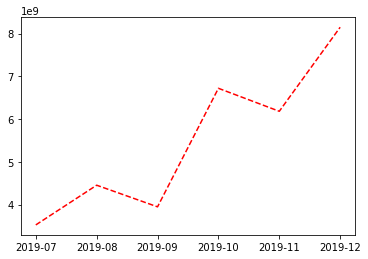

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

monthly_amount = dataset["gmv"].groupby(dataset['order_month']).sum().reset_index()
print(monthly_amount)
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'],color='red',linestyle='dashed') #sumbu x dan y (--,--)
plt.show()

In [ ]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

Custum grafik

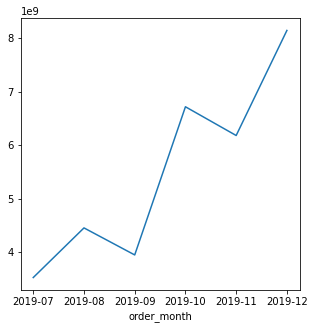

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']   #buat kolom baru
plt.figure(figsize=(5,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()      #membuat plot dengan agregat
plt.show()

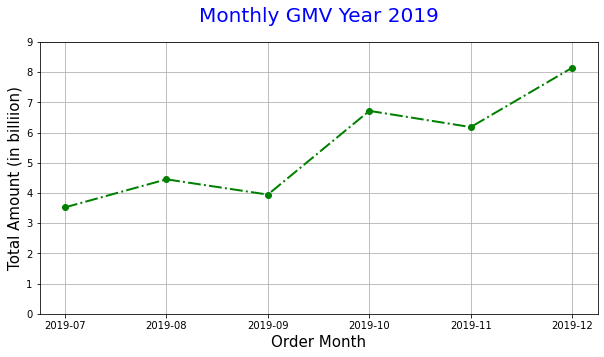

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(10, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in billiion)', fontsize=15)
plt.ylim(ymin=0)                        #plot y tick min 0
labels, loocations = plt.yticks()       #list y tick
plt.yticks(labels, (labels/1000000000).astype(int))
plt.grid()
plt.show()

Add info in grafik

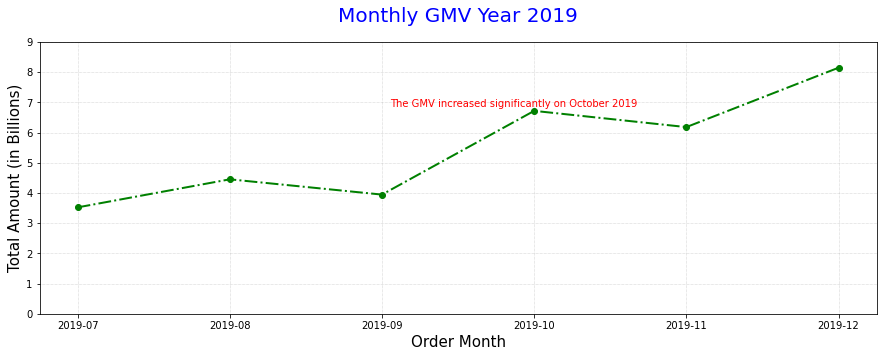

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.7, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')   #memberi text di plot pada grafik, settranform untuk skala koordinat 0 -1
plt.show()

Save plot as image

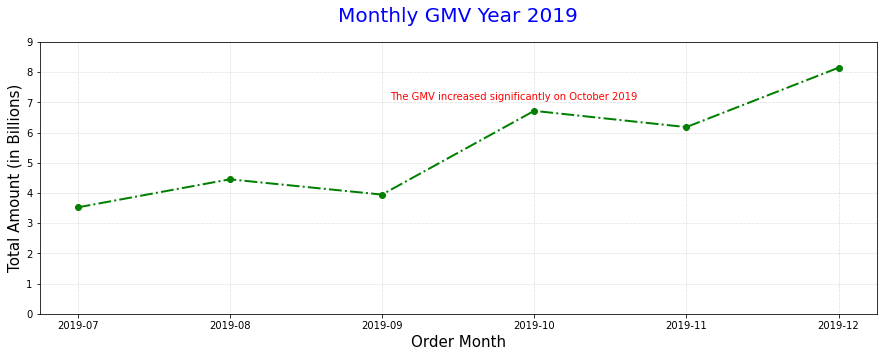

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', dpi = 100)   # to save file png / dpi or quality kualitas gambar
plt.show()

nununique


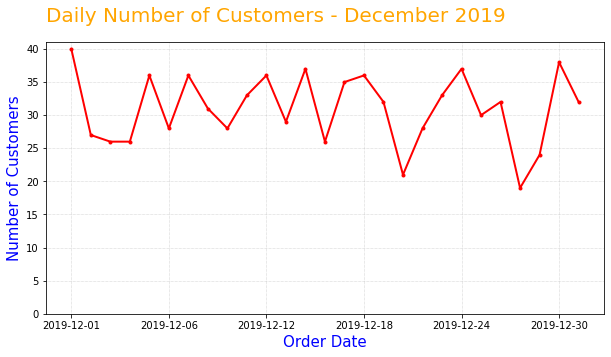

In [2]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2) 
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()